# Project: Identify Customer Segments


In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.cluster import KMeans
from IPython import display
# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data



In [3]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter=';')


In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.shape
print(azdias.shape)
print(azdias.head(n=10))



(891221, 85)
   AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   
5         3                     1          2            2.0   
6        -1                     2          2            5.0   
7        -1                     1          1            3.0   
8        -1                     3          1            3.0   
9        -1                     3          2            4.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3

In [5]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [6]:
print(feat_info.tail(50))

              attribute information_level         type missing_or_unknown
35           SEMIO_KAEM            person      ordinal             [-1,9]
36        SEMIO_PFLICHT            person      ordinal             [-1,9]
37          SEMIO_TRADV            person      ordinal             [-1,9]
38          SHOPPER_TYP            person  categorical               [-1]
39              SOHO_KZ            person  categorical               [-1]
40             TITEL_KZ            person  categorical             [-1,0]
41             VERS_TYP            person  categorical               [-1]
42             ZABEOTYP            person  categorical             [-1,9]
43             ALTER_HH         household     interval                [0]
44         ANZ_PERSONEN         household      numeric                 []
45            ANZ_TITEL         household      numeric                 []
46   HH_EINKOMMEN_SCORE         household      ordinal             [-1,0]
47         KK_KUNDENTYP         househ


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data


#### Step 1.1.2: Assess Missing Data in Each Column


In [7]:
# make a dictionary of converting the string to list of integers
convert_dict = {'[-1,0]' : [-1,0],
          '[-1,0,9]': [-1,0,9],
          '[-1, 0, 9]': [-1,0,9],
          '[0]': [0],
          '[-1]': [-1],
          '[]': [],
          '[-1,X]': [-1,'X'],
          '[-1,XX]': [-1,'XX'],
          '[XX]': ['XX'],
          '[-1,9]' : [-1,9],
          '[-1.0]': [-1.0]}
   
    
feat_info_dic=dict (zip(feat_info['attribute'], feat_info['missing_or_unknown']))


In [8]:
# Identify missing or unknown data values and convert them to NaNs.
for i in azdias.columns:
    for j in convert_dict [str(feat_info_dic[i])]:
        azdias[i] = azdias[i].replace(j, np.NaN)
azdias.head(20)
print(azdias.shape)


(891221, 85)


(85,)
(891221, 85)


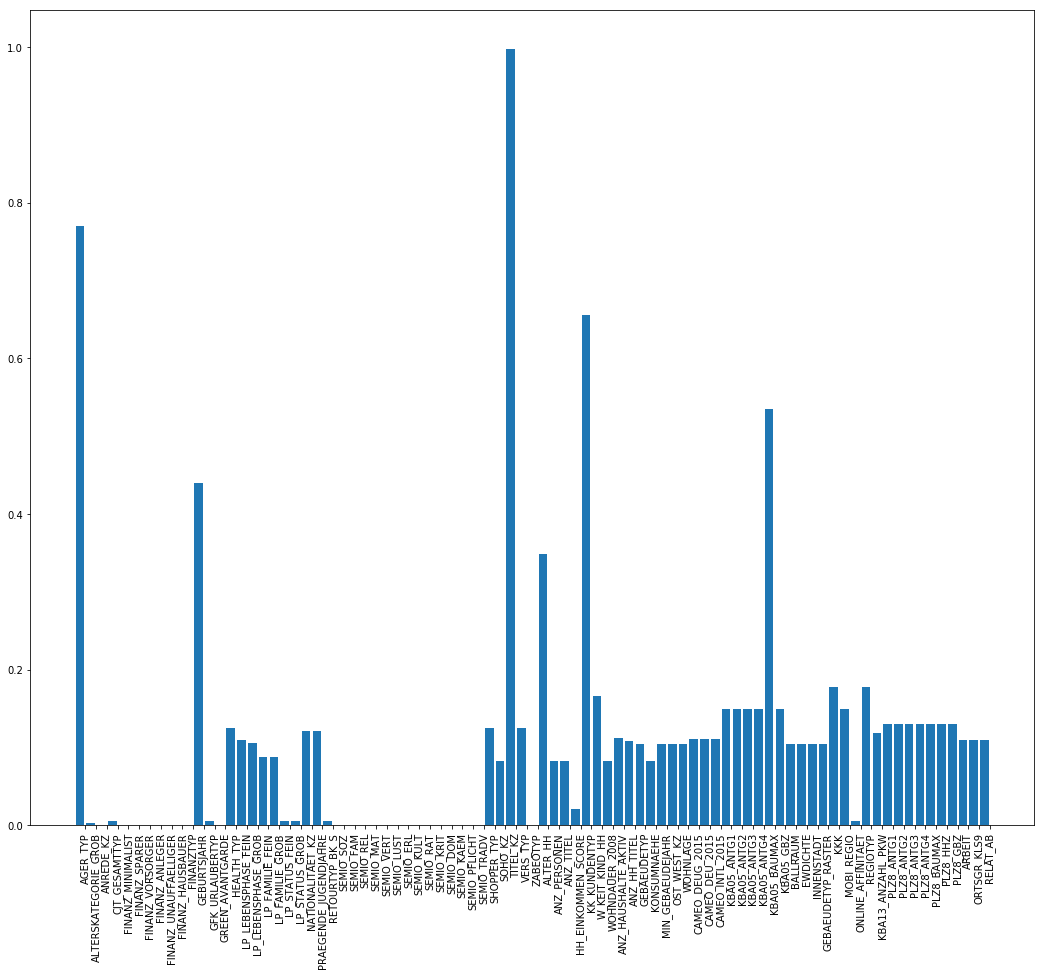

In [9]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
null_counts=azdias.isnull().sum(0)/azdias.shape[0]
plt.figure(figsize=(18,15))
plt.xticks(np.arange(len(null_counts))+0.5, null_counts.index, rotation='vertical')
plt.bar(np.arange(len(null_counts)),null_counts)
print(null_counts.shape)
print(azdias.shape)


In [10]:
# Investigate patterns in the amount of missing data in each column.
col_null_list=[]
for i in null_counts.index:
    if null_counts[i]> 0.15:
        col_null_list.append(i)

print(len(col_null_list))        
print (col_null_list)

print(azdias.shape)


9
['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'KBA05_BAUMAX', 'KKK', 'REGIOTYP']
(891221, 85)


In [11]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
azdias.drop(col_null_list, axis=1, inplace=True)
print (azdias.shape)

(891221, 76)


#### Step 1.1.3: Assess Missing Data in Each Row



In [12]:
# How much data is missing in each row of the dataset?

null_rows=azdias.isnull().sum(1)/azdias.shape[1]
null_rows.shape

(891221,)

In [13]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

Null=[]
Null_index=[]
for i in null_rows.index:
    if null_rows[i]> 0.02:
        Null.append('samples_high_null')
        Null_index.append(i)
    else:
        Null.append('samples_low_null')
        

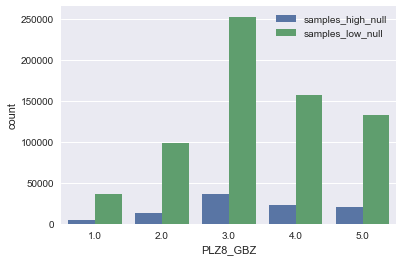

In [14]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

sns.set(style="darkgrid")
ax= sns.countplot(azdias['PLZ8_GBZ'], hue= Null, data=azdias)

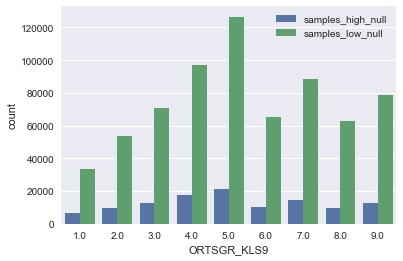

In [15]:
ax2= sns.countplot(azdias['ORTSGR_KLS9'], hue= Null, data=azdias)

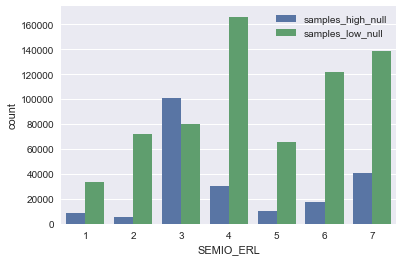

In [16]:
ax3 = sns.countplot(x=azdias['SEMIO_ERL'], hue= Null, data=azdias)

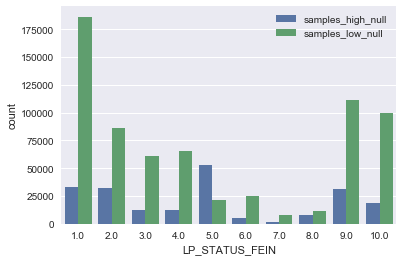

In [17]:
ax4 = sns.countplot(x=azdias['LP_STATUS_FEIN'], hue= Null, data=azdias)

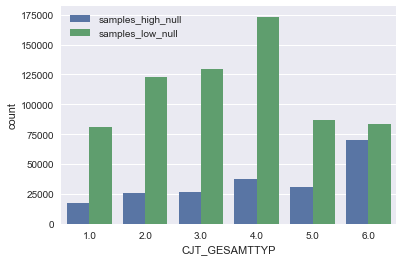

In [18]:
ax5 = sns.countplot(azdias['CJT_GESAMTTYP'], hue= Null, data=azdias)

In [19]:
azdias.drop(azdias.index[Null_index], inplace=True)
print(azdias.shape)

(677466, 76)


### Step 1.2: Select and Re-Encode Features


In [20]:
# How many features are there of each data type?

feat_info.groupby('type').size()


type
categorical    21
interval        1
mixed           7
numeric         7
ordinal        49
dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features


In [10]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
drop_list=['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 
        'LP_STATUS_GROB','NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP',
            'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
azdias.drop(drop_list, axis=1, inplace=True )
azdias.shape

(891221, 72)

In [11]:
# Re-encode categorical variable(s) to be kept in the analysis.

binary_cat_to_num={'OST_WEST_KZ':     {"O": 0, "W": 1}}
azdias.replace(binary_cat_to_num, inplace=True)
azdias['OST_WEST_KZ'].head(15)
azdias.shape

(891221, 72)

#### Step 1.2.2: Engineer Mixed-Type Features


In [12]:
drop_list_mixed=['LP_LEBENSPHASE_GROB', 'LP_LEBENSPHASE_FEIN', 'WOHNLAGE', 'PLZ8_BAUMAX']
azdias.drop(drop_list_mixed,axis=1, inplace=True )
azdias.shape

(891221, 68)

In [13]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
azdias['PRAEGENDE_JUGENDJAHRE_movement']=azdias['PRAEGENDE_JUGENDJAHRE']
#print (azdias['PRAEGENDE_JUGENDJAHRE_movement'])
movement_dict = {'PRAEGENDE_JUGENDJAHRE_movement': {1:0, 2:-1, 3:0, 4:-1, 5:0,  6:-1, 7:-1, 8:0, 9:-1, 10:0, 11:-1, 12:0,
                                       13:-1, 14:0, 15:-1}}

azdias.replace (movement_dict, inplace=True)
    
#print(azdias['PRAEGENDE_JUGENDJAHRE_movement'])
print (azdias.shape)

(891221, 69)


In [14]:
azdias['PRAEGENDE_JUGENDJAHRE_decade']=azdias['PRAEGENDE_JUGENDJAHRE']

decade_dict = {'PRAEGENDE_JUGENDJAHRE_decade': {1:40, 2: 40, 3: 50, 4: 50, 5: 60,  6: 60, 7:60, 8:70, 9: 70, 10: 80, 11: 80, 12: 80,
                                       13: 80, 14: 90, 15: 90}}

azdias.replace (decade_dict, inplace=True)

#print(azdias['PRAEGENDE_JUGENDJAHRE_decade'])
azdias.shape

(891221, 70)

In [15]:
azdias.drop ('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)
print(azdias.shape)

(891221, 69)


In [16]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

azdias['CAMEO_INTL_2015_tens']=azdias['CAMEO_INTL_2015']

tens_dict = {'CAMEO_INTL_2015_tens': {11:1, 12:1 , 13:1, 14:1, 15:1,  21:2, 22:2, 23:2, 24:2, 25:2, 31:3, 32:3, 
                                        33:3, 34:3, 35:3, 41:4 , 42:4 , 43:4 , 44:4, 45:4 , 51:5 , 52:5 , 53:5 ,54:5, 55:5}}

azdias.replace (tens_dict, inplace=True)
print(azdias.shape)

(891221, 70)


In [17]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

azdias['CAMEO_INTL_2015_ones']=azdias['CAMEO_INTL_2015']

ones_dict = {'CAMEO_INTL_2015_ones': {11:1, 12:2 , 13:3, 14:4, 15:5,  21:1, 22:2, 23:3, 24:4, 25:5, 31:1, 32:2, 
                                        33:3, 34:4, 35:5, 41:1 , 42:2 , 43:3 , 44:4, 45:5 , 51:1 , 52:2 , 53:3 ,54:4 , 55:5 }}

azdias.replace (ones_dict, inplace=True)
print(azdias.shape)

(891221, 71)


In [18]:
azdias.drop ('CAMEO_INTL_2015', axis=1, inplace=True)
print(azdias.shape)

(891221, 70)


In [19]:
col_names=azdias.columns
print(col_names)

Index(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GEBURTSJAHR',
       'GREEN_AVANTGARDE', 'HEALTH_TYP', 'RETOURTYP_BK_S', 'SEMIO_SOZ',
       'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST',
       'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM',
       'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SOHO_KZ', 'TITEL_KZ',
       'VERS_TYP', 'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'HH_EINKOMMEN_SCORE', 'KK_KUNDENTYP', 'W_KEIT_KIND_HH',
       'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'KBA05_ANTG1', 'KBA05_ANTG2',
       'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_BAUMAX', 'KBA05_GBZ', 'BALLRAUM',
       'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG

#### Step 1.2.3: Complete Feature Selection


### Step 1.3: Create a Cleaning Function


In [20]:
def clean_data(df, null_list):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...

    for i in df.columns:
        for j in convert_dict [str(feat_info_dic[i])]:
            df[i] = df[i].replace(j, np.NaN)
            
    
    df.drop(null_list, axis=1, inplace=True)
    
    #Null rows
    null_rows=df.isnull().sum(1)/df.shape[1]
    Null=[]
    Null_index=[]
    for i in null_rows.index:
        if null_rows[i]> 0.02:
            Null.append(1)
            Null_index.append(i)
        else:
            Null.append(0)
     
    # select, re-encode, and engineer column values.

    df.drop(df.index[Null_index], inplace=True)
    
    drop_list=['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 
        'LP_STATUS_GROB','NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP',
            'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
    df.drop(drop_list, axis=1, inplace=True)
        
    #Re-encode binary categorical variable
    binary_cat_to_num={'OST_WEST_KZ':     {"O": 0, "W": 1}}
    df.replace(binary_cat_to_num, inplace=True)
    
    #Drop mixed type features
    drop_list_mixed=['LP_LEBENSPHASE_GROB', 'LP_LEBENSPHASE_FEIN', 'WOHNLAGE', 'PLZ8_BAUMAX']
    df.drop(drop_list_mixed,axis=1, inplace=True )
    
    
    # Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
    df['PRAEGENDE_JUGENDJAHRE_movement']=df['PRAEGENDE_JUGENDJAHRE']
    movement_dict = {'PRAEGENDE_JUGENDJAHRE_movement': {1:0, 2:-1, 3:0, 4:-1, 5:0,  6:-1, 7:-1, 8:0, 9:-1, 10:0, 11:-1, 12:0,
                                          13:-1, 14:0, 15:-1}}
    df.replace (movement_dict, inplace=True)
    
    
    df['PRAEGENDE_JUGENDJAHRE_decade']=df['PRAEGENDE_JUGENDJAHRE']
    decade_dict = {'PRAEGENDE_JUGENDJAHRE_decade': {1:40, 2: 40, 3: 50, 4: 50, 5: 60,  6: 60, 7:60, 8:70, 9: 70, 10: 80, 11: 80, 12: 80,
                                       13: 80, 14: 90, 15: 90}}
    df.replace (decade_dict, inplace=True)
    
    # Investigate "CAMEO_INTL_2015" and engineer two new variables.

    df['CAMEO_INTL_2015_tens']=df['CAMEO_INTL_2015']
    tens_dict = {'CAMEO_INTL_2015_tens': {11:1, 12:1 , 13:1, 14:1, 15:1,  21:2, 22:2, 23:2, 24:2, 25:2, 31:3, 32:3, 
                                        33:3, 34:3, 35:3, 41:4 , 42:4 , 43:4 , 44:4, 45:4 , 51:5 , 52:5 , 53:5 ,54:5, 55:5}}
    df.replace (tens_dict, inplace=True)
    
    
    df['CAMEO_INTL_2015_ones']=df['CAMEO_INTL_2015']
    ones_dict = {'CAMEO_INTL_2015_ones': {11:1, 12:2 , 13:3, 14:4, 15:5,  21:1, 22:2, 23:3, 24:4, 25:5, 31:1, 32:2, 
                                        33:3, 34:4, 35:5, 41:1 , 42:2 , 43:3 , 44:4, 45:5 , 51:1 , 52:2 , 53:3 ,54:4 , 55:5 }}
    df.replace (ones_dict, inplace=True)
    
    df.drop ('CAMEO_INTL_2015', axis=1, inplace=True)
    
    #replace NaNs
    imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent',axis=0)
    df=pd.DataFrame(imp.fit_transform(df))
    
    # Return the cleaned dataframe.
    
    return df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling



In [21]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent',axis=0)
azdias=pd.DataFrame(imp.fit_transform(azdias), columns=[col_names])

print(azdias.isnull().sum().sum())
azdias.head()

0


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GEBURTSJAHR,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_movement,PRAEGENDE_JUGENDJAHRE_decade,CAMEO_INTL_2015_tens,CAMEO_INTL_2015_ones
0,2.0,2.0,1.0,3.0,4.0,3.0,5.0,5.0,3.0,1967.0,...,0.0,3.0,3.0,4.0,5.0,3.0,0.0,90.0,51.0,51.0
1,2.0,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,1996.0,...,1.0,5.0,4.0,3.0,5.0,4.0,0.0,90.0,51.0,51.0
2,2.0,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1979.0,...,0.0,4.0,4.0,3.0,5.0,2.0,-1.0,90.0,24.0,24.0
3,2.0,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,1957.0,...,0.0,3.0,4.0,2.0,3.0,3.0,0.0,70.0,12.0,12.0
4,2.0,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,1963.0,...,1.0,3.0,3.0,4.0,6.0,5.0,0.0,70.0,43.0,43.0


In [22]:
# Apply feature scaling to the general population demographics data.
scaler=StandardScaler()
azdias=scaler.fit_transform(azdias)

azdias=pd.DataFrame(azdias)
azdias.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.17327,-0.751680,-1.045218,-0.056416,0.804890,-0.303378,1.285741,1.429871,-0.055511,-0.004318,...,-0.846764,-0.572015,-0.317206,0.758890,-0.120115,-0.049267,0.494701,0.994991,0.977331,0.977331
1,0.17327,-1.743339,0.956738,-1.570358,1.487601,-1.059731,1.285741,0.757254,1.422415,2.173778,...,0.546491,1.575581,0.640354,-0.263506,-0.120115,0.729399,0.494701,0.994991,0.977331,0.977331
2,0.17327,0.239980,0.956738,-1.570358,0.804890,-1.816084,-0.675554,0.084637,1.422415,0.896963,...,-0.846764,0.501783,0.640354,-0.263506,-0.120115,-0.827934,-2.021423,0.994991,-0.937974,-0.937974
3,0.17327,1.231640,0.956738,0.700556,-0.560532,1.209329,-0.675554,-1.260597,-0.794475,-0.755385,...,-0.846764,-0.572015,0.640354,-1.285903,-1.039247,-0.049267,0.494701,-0.363493,-1.789221,-1.789221
4,0.17327,0.239980,-1.045218,0.700556,0.122179,0.452976,-1.329319,0.084637,-0.794475,-0.304744,...,0.546491,-0.572015,-0.317206,0.758890,0.339451,1.508065,0.494701,-0.363493,0.409833,0.409833


### Step 2.2: Perform Dimensionality Reduction


In [23]:
# Apply PCA to the data.
pca = PCA(30)

azdias_pca= pca.fit_transform(azdias)


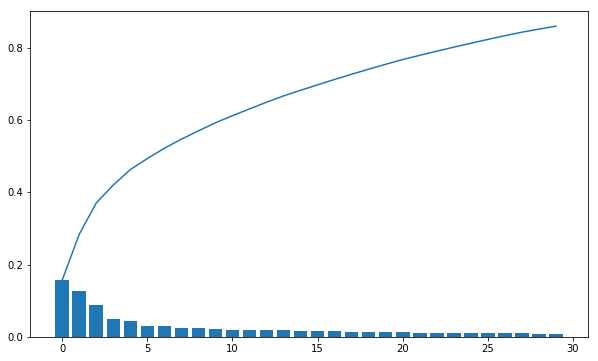

In [24]:
# Investigate the variance accounted for by each principal component.

num_component = len(pca.explained_variance_ratio_)
ind=np.arange(num_component)
vals=pca.explained_variance_ratio_
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
cumvals=np.cumsum(vals)
ax.bar(ind,vals)
ax.plot(ind, cumvals)

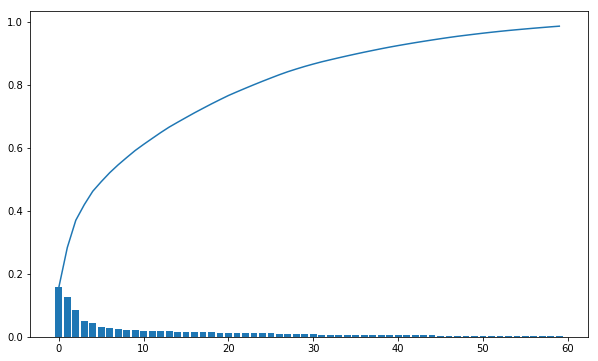

In [25]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca2 = PCA(60)
azdias_pca2= pca2.fit_transform(azdias)
num_component = len(pca2.explained_variance_ratio_)
ind2=np.arange(num_component)
vals2=pca2.explained_variance_ratio_
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
cumvals=np.cumsum(vals2)
ax.bar(ind2,vals2)
ax.plot(ind2, cumvals)

In [26]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
def map_weigths(pca, pc_num):
    vectors=pca.components_
    W=pd.DataFrame(vectors[pc_num], col_names)#.columns=['weights']
    W.columns=['weights']
    Z=W.sort_values(by='weights', ascending=False)
    print(Z.head(10))


In [27]:
map_weigths(pca,1)

                       weights
ALTERSKATEGORIE_GROB  0.229180
FINANZ_VORSORGER      0.217527
SEMIO_ERL             0.188075
RETOURTYP_BK_S        0.164204
SEMIO_LUST            0.159112
FINANZ_HAUSBAUER      0.139763
PLZ8_ANTG4            0.137160
ORTSGR_KLS9           0.125119
PLZ8_ANTG3            0.124458
KBA05_BAUMAX          0.111187


In [28]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_weigths(pca,2)

                    weights
SEMIO_VERT         0.347584
SEMIO_SOZ          0.299767
SEMIO_KULT         0.299053
SEMIO_FAM          0.236476
PLZ8_ANTG4         0.094580
FINANZ_MINIMALIST  0.089019
SEMIO_MAT          0.085296
SEMIO_REL          0.074210
KBA05_BAUMAX       0.067523
ORTSGR_KLS9        0.061520


In [29]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_weigths(pca,3)

                    weights
GREEN_AVANTGARDE   0.308542
ORTSGR_KLS9        0.211655
PLZ8_ANTG4         0.177177
ONLINE_AFFINITAET  0.172184
ANZ_PERSONEN       0.156292
SEMIO_TRADV        0.147061
ANREDE_KZ          0.145364
SEMIO_RAT          0.135756
KBA05_ANTG1        0.128810
MOBI_REGIO         0.128572


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population



In [30]:
# Over a number of different cluster counts...
kmeans=KMeans(20)

    # run k-means clustering on the data and...
model=kmeans.fit(azdias_pca)    
    
    # compute the average within-cluster distances.
    
kmeans_score=model.score(azdias_pca) 
print(np.abs(kmeans_score))

27286949.5445


In [57]:
# Investigate the change in within-cluster distance across number of clusters.
scores=[]
centers=[]
#kmeans_loop=KMeans()
for i in range(1, 27, 5):
    scores.append(np.abs(KMeans(i).fit(azdias_pca).score(azdias_pca)))
    centers.append(i)

Text(0.5,1,'SSE vs K')

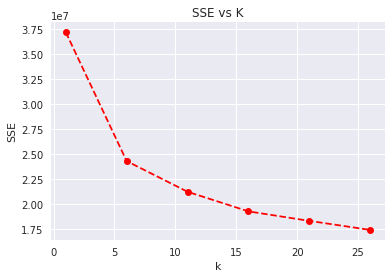

In [61]:
plt.plot(centers, scores, linestyle='--', marker='o', color='r')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE vs K')

In [84]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans_general=KMeans(5)
model_general=kmeans_general.fit(azdias_pca)
general_pred=model_general.predict(azdias_pca)
kmeans_score=model_general.score(azdias_pca) 
print(np.abs(kmeans_score))

37547087.5978


In [44]:
len(general_pred)

891221

### Step 3.2: Apply All Steps to the Customer Data


In [85]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', delimiter=';')
customers.head()
#customers.shape

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [86]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers= clean_data(customers, col_null_list)

scaler=StandardScaler()
customers=scaler.fit_transform(customers)

print(customers.shape)
print(customers[10])

(122867, 62)
[ 0.70017953  1.44637648 -1.28546474 -0.50516064  0.50341387 -0.59224995
  0.20916725  1.73386189 -1.03790443  0.02520316 -1.42065523  0.92007485
  0.3743837  -1.1264634  -1.52166813 -1.21979274 -1.27878441  0.90028948
  1.22562811 -1.67761227 -0.61971253  1.20800969  0.62025251  1.35732867
  0.74580443 -1.38471115 -0.09943786  0.99048211 -1.04445809 -0.13753729
  1.06079888 -1.62369589  0.31564742 -0.12973541 -0.80182998 -0.33840253
  0.29474759 -1.62624026 -1.11577332  3.56907166 -0.31182632 -1.42840585
 -1.56540931  1.32416956 -1.4287467   0.17273083 -2.09952621 -1.48877896
 -0.25302746 -1.71232362  1.51991761  1.83068861  0.73146101  1.46869499
 -0.62155186  0.17760607  1.34162975  1.4825062   1.04399725 -1.41394008
  1.60640552  1.60640552]


In [87]:
pca = PCA(30)
customers_pca= pca.fit_transform(customers)

customer_pred=model_general.predict(customers_pca)  

print(customer_pred.shape)
customer_pred[:10]

(122867,)


array([1, 2, 0, 1, 3, 1, 4, 3, 3, 3], dtype=int32)

### Step 3.3: Compare Customer Data to Demographics Data



In [88]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
customer_class_count=[0, 0, 0, 0, 0]
for i in customer_pred:
    if i==0:
        customer_class_count[0]+=1 
    elif i==1: 
        customer_class_count[1]+=1
    elif i==2:
        customer_class_count[2]+=1 
    elif i==3: 
        customer_class_count[3]+=1
    else:
        customer_class_count[4]+=1
print(customer_class_count)
customer_class_percentage=np.divide(customer_class_count,len(customer_pred))*100
print(customer_class_percentage)

[19993, 28117, 12424, 38607, 23726]
[ 16.27206654  22.88409418  10.11174685  31.42178128  19.31031115]


In [89]:
general_class_count=[0, 0, 0, 0, 0]
for i in general_pred:
    if i==0:
        general_class_count[0]+=1 
    elif i==1: 
        general_class_count[1]+=1
    elif i==2:
        general_class_count[2]+=1 
    elif i==3: 
        general_class_count[3]+=1
    else:
        general_class_count[4]+=1
print(general_class_count)
general_class_percentage=np.divide(general_class_count,len(general_pred))*100
print(general_class_percentage)

[217381, 180406, 83226, 251524, 158684]
[ 24.3913687   20.2425661    9.33842448  28.22240499  17.80523574]


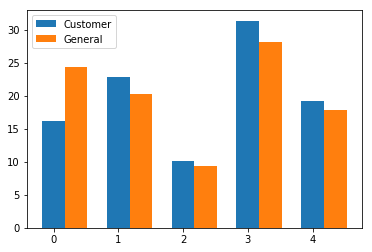

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
indices = np.arange(5) 
width = 0.35
plt.bar(indices, customer_class_percentage, width, label='Customer')
plt.bar(indices+width, general_class_percentage, width, label='General')
plt.legend(loc='best')
plt.show()

Generally, since we see a mismatch from one to the other cluster assignment proportions, there are only particular segments of the population that are interested in the company's products.
Cluster #2 and #4 are fairly the same. However, cluster #1 and #3 are overpresented in the customer data comapred to the general population. It shows there is a higher proportion of persons in a cluster for the customer data compared to the general population then that suggests the people in these clusters to be a target audience for the company.

People in cluster #0 are underrepresented in the customer data compared to the general population. That is the proportion of the data in a cluster being larger in the general population than the customer data (only 16% of customers closest to a population centroid that captures 24% of the data) suggests that group of persons to be outside of the target demographics.

We can describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company.
Cluster #1 and #4 segments is relatively popular with company since its proportion is more than the public.
Cluster #0 segments is relatively unpopular with company since its proportion is much less than the public.